# 我們使用 Gaussian Density Function 來預測 Pokemon 的類型
* 主要的學習教材為台大電機系李弘毅教授的線上課程 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Classification%20(v2).pdf
* 我們假設 Pokemon 也是常態分佈
* 故找出每一個類型在 Training Data 分佈的狀況，然後用 Gaussian Density Function 來去模擬
* Gaussian Density Function 需要計算兩個東西分別為 mean 及 covarience matrix 


In [124]:
import pandas as pd
import numpy as np

## 使用 scipy 來計算 gaussian density 的範例

In [174]:

from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)

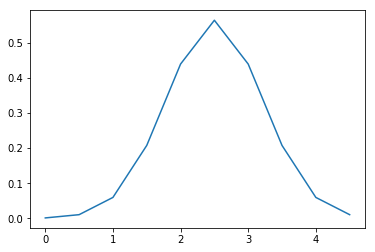

In [175]:
plt.plot(x, y)
plt.show()

## 我們來載入資料

In [176]:
df= pd.read_csv("./pokemon.csv")

In [129]:
df.columns

Index([u'name', u'species', u'cp', u'hp', u'weight', u'height',
       u'power_up_stardust', u'power_up_candy', u'attack_weak',
       u'attack_weak_type', u'attack_weak_value', u'attack_strong',
       u'attack_strong_type', u'attack_strong_value', u'cp_new', u'hp_new',
       u'weight_new', u'height_new', u'power_up_stardust_new',
       u'power_up_candy_new', u'attack_weak_new', u'attack_weak_type_new',
       u'attack_weak_value_new', u'attack_strong_new',
       u'attack_strong_type_new', u'attack_strong_value_new', u'notes'],
      dtype='object')

In [177]:
pknormal = df[df['attack_strong_type'] == 'Normal']

In [178]:
pkflying = df[df['attack_strong_type'] == 'Flying']

In [179]:
pknormal

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
39,Weedle1,Weedle,169,45,3.38,0.29,2200,2,Bug Bite,Bug,...,0.58,2200,2,Poison Sting,Poison,6,Struggle,Normal,15,NaN
40,Weedle2,Weedle,15,15,3.27,0.28,200,1,Bug Bite,Bug,...,0.55,200,1,Poison Sting,Poison,6,Struggle,Normal,15,NaN
41,Weedle3,Weedle,25,17,3.11,0.29,400,1,Poison Sting,Poison,...,0.58,400,1,Bug Bite,Bug,5,Struggle,Normal,15,NaN
42,Weedle4,Weedle,222,48,2.93,0.29,2500,2,Poison Sting,Poison,...,0.59,2500,2,Bug Bite,Bug,5,Struggle,Normal,15,NaN
43,Weedle5,Weedle,251,56,4.51,0.34,2500,2,Poison Sting,Poison,...,0.67,2500,2,Poison Sting,Poison,6,Struggle,Normal,15,NaN
44,Weedle6,Weedle,139,46,4.50,0.32,1900,2,Poison Sting,Poison,...,0.64,1900,2,Poison Sting,Poison,6,Struggle,Normal,15,NaN
45,Weedle7,Weedle,45,27,2.55,0.29,600,1,Bug Bite,Bug,...,0.58,600,1,Bug Bite,Bug,5,Struggle,Normal,15,NaN
46,Weedle8,Weedle,129,45,4.01,0.34,1600,2,Bug Bite,Bug,...,0.69,1600,2,Bug Bite,Bug,5,Struggle,Normal,15,NaN
47,Weedle9,Weedle,200,49,2.62,0.27,3000,3,Poison Sting,Poison,...,0.55,3000,3,Bug Bite,Bug,5,Struggle,Normal,15,NaN
48,Weedle10,Weedle,179,47,3.95,0.35,2500,2,Bug Bite,Bug,...,0.70,2500,2,Poison Sting,Poison,6,Struggle,Normal,15,NaN


In [180]:
pkflying

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN
5,Pidgey6,Pidgey,129,35,2.07,0.35,800,1,Quick Attack,Normal,...,1.27,800,1,Wing Attack,Flying,9,Aerial Ace,Flying,30,NaN
6,Pidgey7,Pidgey,10,10,0.92,0.25,200,1,Tackle,Normal,...,0.90,200,1,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
10,Pidgey11,Pidgey,114,31,1.58,0.26,800,1,Tackle,Normal,...,0.96,800,1,Wing Attack,Flying,9,Aerial Ace,Flying,30,NaN
11,Pidgey12,Pidgey,333,52,1.85,0.30,3000,3,Tackle,Normal,...,1.10,3000,3,Steel Wing,Steel,15,Aerial Ace,Flying,30,NaN
12,Pidgey13,Pidgey,132,33,1.63,0.28,800,1,Quick Attack,Normal,...,1.03,800,1,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
14,Pidgey15,Pidgey,42,19,2.01,0.30,400,1,Quick Attack,Normal,...,1.11,400,1,Wing Attack,Flying,9,Aerial Ace,Flying,30,NaN


## 假定題目我們要來預測寶可夢的種類
* 為二元分類問題: 是 fying 或者是 normal
* 直觀的假設 HP 和 Weight 為 Strong Feature

In [185]:
normal_f1 = pknormal['hp']
normal_f2 = pknormal['weight']

flying_f1 = pkflying['hp']
flying_f2 = pkflying['weight'] 

In [186]:
x_c1 = np.array(zip(normal_f1.tolist(),normal_f2.tolist()))
x_c2 = np.array(zip(flying_f1.tolist(),flying_f2.tolist()))
c1_mean = np.mean(x_c1,axis=0)
c2_mean = np.mean(x_c2,axis=0)
xc1_xc1 = x_c1-c1_mean
xc2_xc2 = x_c2-c2_mean

In [187]:
cov_c1 = np.matmul(xc1_xc1.transpose(),xc1_xc1)/c1_mean.shape[0]
cov_c2 = np.matmul(xc2_xc2.transpose(),xc2_xc2)/c2_mean.shape[0]

In [188]:
x = np.append(x_c1,x_c2,axis=0)

In [189]:
y = [0] * x_c1.shape[0] + [1]*x_c2.shape[0]

### 從下圖看來，兩個  Gaussian Density Function 所產生出來的 Probability 基準不一至

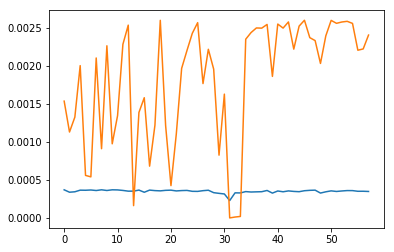

In [191]:
cov = (cov_c1*len(x_c1) + cov_c2*len(x_c2))/(len(x_c1)+len(x_c2))
y1 = multivariate_normal.pdf(x, mean=c1_mean, cov=cov_c1)
y2 = multivariate_normal.pdf(x, mean=c2_mean, cov=cov_c2)
plt.plot(y1)
plt.plot(y2)
plt.show()

In [193]:
error =0
for label,c1p,c2p in zip(y,y1,y2):
    if c1p > c2p and label == 1:
        error += 1
    elif c1p < c2p and label ==0:
        error +=1
print("錯了 {} 個".format(error))

錯了 30 個


## 採用 share covarience matrix，來降 model 的 varience
* 用白話來說讓兩個類別的 density function 基準是一至的


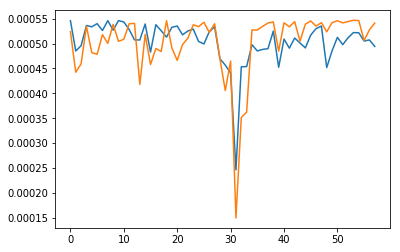

In [195]:
cov = (cov_c1*len(x_c1) + cov_c2*len(x_c2))/(len(x_c1)+len(x_c2))

y1 = multivariate_normal.pdf(x, mean=c1_mean, cov=cov)
y2 = multivariate_normal.pdf(x, mean=c2_mean, cov=cov)
plt.plot(y1)
plt.plot(y2)
plt.show()

In [196]:
error =0
for label,c1p,c2p in zip(y,y1,y2):
    if c1p > c2p and label == 1:
        error += 1
    elif c1p < c2p and label ==0:
        error +=1
print("錯了 {} 個".format(error))

錯了 10 個
